PIP SETUP

In [2]:
%pip install -Uq "unstructured[all-docs]" pillow lxml pillow
%pip install -Uq chromadb tiktoken
%pip install -Uq langchain langchain-community langchain-openai langchain-groq
%pip install -Uq python_dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.72.0rc1 requires protobuf<7.0dev,>=6.30.0, but you have protobuf 5.29.4 which is incompatible.

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# filepath: c:\Users\LEGION\Desktop\IAAC\TERM 3\SK learn\RAG.ipynb
%pip install sympy>=1.12
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install "unstructured[local-inference]" pillow lxml
# If you need all features of unstructured, you can use "unstructured[all-docs]"
# but "local-inference" is more targeted for hi_res PDF processing.
# %pip install "unstructured[all-docs]" pillow lxml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached protobuf-6.31.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
Using cached protobuf-6.31.0-cp310-abi3-win_amd64.whl (435 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.32.1 requires protobuf<6.0,>=5.0, but you have protobuf 6.31.0 which is incompatible.

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from dotenv import load_dotenv
load_dotenv()

True

### Partition PDF tables, text, and images

---



In [39]:
from unstructured.partition.pdf import partition_pdf

output_path = "./Documents/"
file_path = output_path + 'The_Architects_Studio_Companion_Rules_of_Thumb_for_Preliminary_Design_5th_Edition_by_Edward_Allen_Joseph_Iano.pdf'


# Reference: https://docs.unstructured.io/open-source/core-functionality/chunking
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image", "Table"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=2500,                  # defaults to 500
    combine_text_under_n_chars=500,       # defaults to 0
    new_after_n_chars=1500,

    # extract_images_in_pdf=True,          # deprecated
)

In [40]:
len(chunks)  # number of chunks

1048

In [41]:
chunks[12].metadata.orig_elements

In [42]:
# Display the 12th chunk (index 11) from the PDF
# Display the 12th chunk (index 11) from the PDF and mark its page in the PDF
print(chunks[11])

# Show the page number for this chunk
page_number = getattr(chunks[11].metadata, "page_number", None)
print(f"Chunk 11 is on page {page_number} of the PDF.")

This book provides build- ing code information based on two model building codes: the International Code Council’s International Building Code (2009) and the National Research Council of Canada, Canadian Commission on Building and Fire Codes’ National Building Code of Canada (2010). These two model codes form the basis for the vast major- ity of building codes enacted by jurisdictions throughout the United States and Canada. This book condenses from these two model codes the provisions that have the most direct and important effects on building form: height and area limitations, beginning on page 363, and requirements for the design of egress systems, starting on page 261. Code requirements having to do with the detailed design of structural and mechanical compo- nents of buildings are reflected here indirectly through the pre- liminary sizing charts for structural elements (pages 55–135) and the rules of thumb for providing space for mechanical and electrical sys- tems (pages 179–259)

In [9]:
set([str(el) for el in chunks])

{'100\n\nSTEEL ROOF DECKING\n\nSteel roof decking may have a sitecast concrete or gypsum topping or may be covered directly with a variety of board or roofing products. A common and economical configuration for roof decking is 11⁄2-in. (38-mm) metal decking spanning up to 8 ft (2.4 m). Many proprietary metal roof decking systems, with a wide variety of performance characteristics, are available. Consult manufacturers for more information.\n\nFIRE-RESISTANCE RATINGS FOR STEEL DECKING\n\nSteel roof and floor decking may be used in both Combustible and Noncombustible Construction. The fire resistance of roof or floor deck- ing with a concrete topping varies with the configuration of the decking and the thickness of the topping. Though resistance ratings of as high as 3 hours may be possible, for preliminary design, assume that decking must be protected with applied fireproofing or an appropriately fire-resistive ceiling to achieve ratings of more than l hour.\n\n07_9780470641910-cmp04.ind

In [10]:
chunks[0].to_dict()  # first 1000 characters of the first chunk

{'type': 'CompositeElement',
 'element_id': 'b4c6eff8ac2490af7c42b5a1b60271af',
 'text': "STRUCTURAL STEEL COLUMNS\n\nCOLUMN LAYOUT\n\nColumns at the perimeter of a building should be oriented with their flanges facing outward wherever possible to facilitate the attachment of cladding to the building's structural frame. Elsewhere, columns should be oriented with their webs parallel to the axis on which the building is most vulnerable to lateral forces so that the columns may make the greatest contribution to resisting these forces. For example, in buildings with rect- angular footprints, the weaker axis is most frequently parallel to the shorter sides of the structure, and orienting column webs that are parallel to this shorter axis would be preferred.",
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'last_modified': '2025-05-04T14:15:26',
  'page_number': 1,
  'orig_elements': 'eJy9U0tv2zgQ/iuELnuxBImiLCm3okhP6QONc1gEgTGSRhZRStSSVByj6H/fIWUX3W5QFAFSwD7McB7fY3T/

In [11]:
chunks[25].metadata.orig_elements

In [12]:
for i, chunk in enumerate(chunks):
    print(f"\n--- Chunk {i+1} ---\n{chunk}")


--- Chunk 1 ---
STRUCTURAL STEEL COLUMNS

COLUMN LAYOUT

Columns at the perimeter of a building should be oriented with their flanges facing outward wherever possible to facilitate the attachment of cladding to the building's structural frame. Elsewhere, columns should be oriented with their webs parallel to the axis on which the building is most vulnerable to lateral forces so that the columns may make the greatest contribution to resisting these forces. For example, in buildings with rect- angular footprints, the weaker axis is most frequently parallel to the shorter sides of the structure, and orienting column webs that are parallel to this shorter axis would be preferred.

--- Chunk 2 ---
FINISH DIMENSIONS OF STEEL COLUMNS

eee

96

In most cases, structural steel columns are not exposed in the completed construction, and their overall finish dimensions must be increased from those shown in the charts on the facing page to account for the application of fireproofing and finishes. 

In [13]:
elements = chunks[12].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()  # first 1000 characters of the first image

IndexError: list index out of range

In [43]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [44]:
# Display the page number for each chunk in the PDF
for i, chunk in enumerate(chunks):
    page_num = getattr(chunk.metadata, "page_number", None)
    print(f"Chunk {i}: Page {page_num}")

Chunk 0: Page 1
Chunk 1: Page 6
Chunk 2: Page 6
Chunk 3: Page 6
Chunk 4: Page 7
Chunk 5: Page 7
Chunk 6: Page 9
Chunk 7: Page 9
Chunk 8: Page 11
Chunk 9: Page 11
Chunk 10: Page 17
Chunk 11: Page 17
Chunk 12: Page 17
Chunk 13: Page 17
Chunk 14: Page 18
Chunk 15: Page 18
Chunk 16: Page 19
Chunk 17: Page 19
Chunk 18: Page 19
Chunk 19: Page 20
Chunk 20: Page 20
Chunk 21: Page 20
Chunk 22: Page 21
Chunk 23: Page 21
Chunk 24: Page 22
Chunk 25: Page 23
Chunk 26: Page 24
Chunk 27: Page 25
Chunk 28: Page 25
Chunk 29: Page 25
Chunk 30: Page 27
Chunk 31: Page 27
Chunk 32: Page 28
Chunk 33: Page 29
Chunk 34: Page 35
Chunk 35: Page 35
Chunk 36: Page 36
Chunk 37: Page 36
Chunk 38: Page 37
Chunk 39: Page 38
Chunk 40: Page 39
Chunk 41: Page 39
Chunk 42: Page 41
Chunk 43: Page 41
Chunk 44: Page 44
Chunk 45: Page 45
Chunk 46: Page 45
Chunk 47: Page 47
Chunk 48: Page 47
Chunk 49: Page 51
Chunk 50: Page 51
Chunk 51: Page 51
Chunk 52: Page 52
Chunk 53: Page 53
Chunk 54: Page 53
Chunk 55: Page 54
Chunk 56: 

In [45]:
from langchain.schema import Document

# Display the content of a chunk in the PDF
def display_chunk_pages(chunk):
    page_numbers = set()
    for element in chunk.metadata.orig_elements:
        metadata = element.metadata.to_dict()
        if 'Table' in str(type(element)):
            metadata['category'] = 'Table'
        elif 'Image' in str(type(element)):
            metadata['category'] = 'Image'
        else:
            metadata['category'] = 'Text'
        metadata['page_number'] = int(element.metadata.page_number)
        page_numbers.add(metadata['page_number'])
    docs = [
        Document(page_content=element.text, metadata=metadata) for element in chunk.metadata.orig_elements
    ]
    for page_number in page_numbers:
        print(f"\n--- Page {page_number} ---")
        for doc in docs:
            if doc.metadata.get('page_number') == page_number:
                print(f"Category: {doc.metadata.get('category')}")
                print(doc.page_content)
                print("-" * 40)

print(f"Chunk {i}: Page {page_num}")
# Display the content of a chunk in the PDF 
display_chunk_pages(chunk)

Chunk 1047: Page 498

--- Page 498 ---
Category: Text
Z
----------------------------------------
Category: Text
Zoning ordinances, 5
----------------------------------------
Category: Text
10/12/11 12:50 PM
----------------------------------------


Text and table summaries

In [46]:
# separate tables from texts
tables = []
texts = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

In [47]:
# Get the images from the CompositeElement objects
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

ChechCheck waht image 

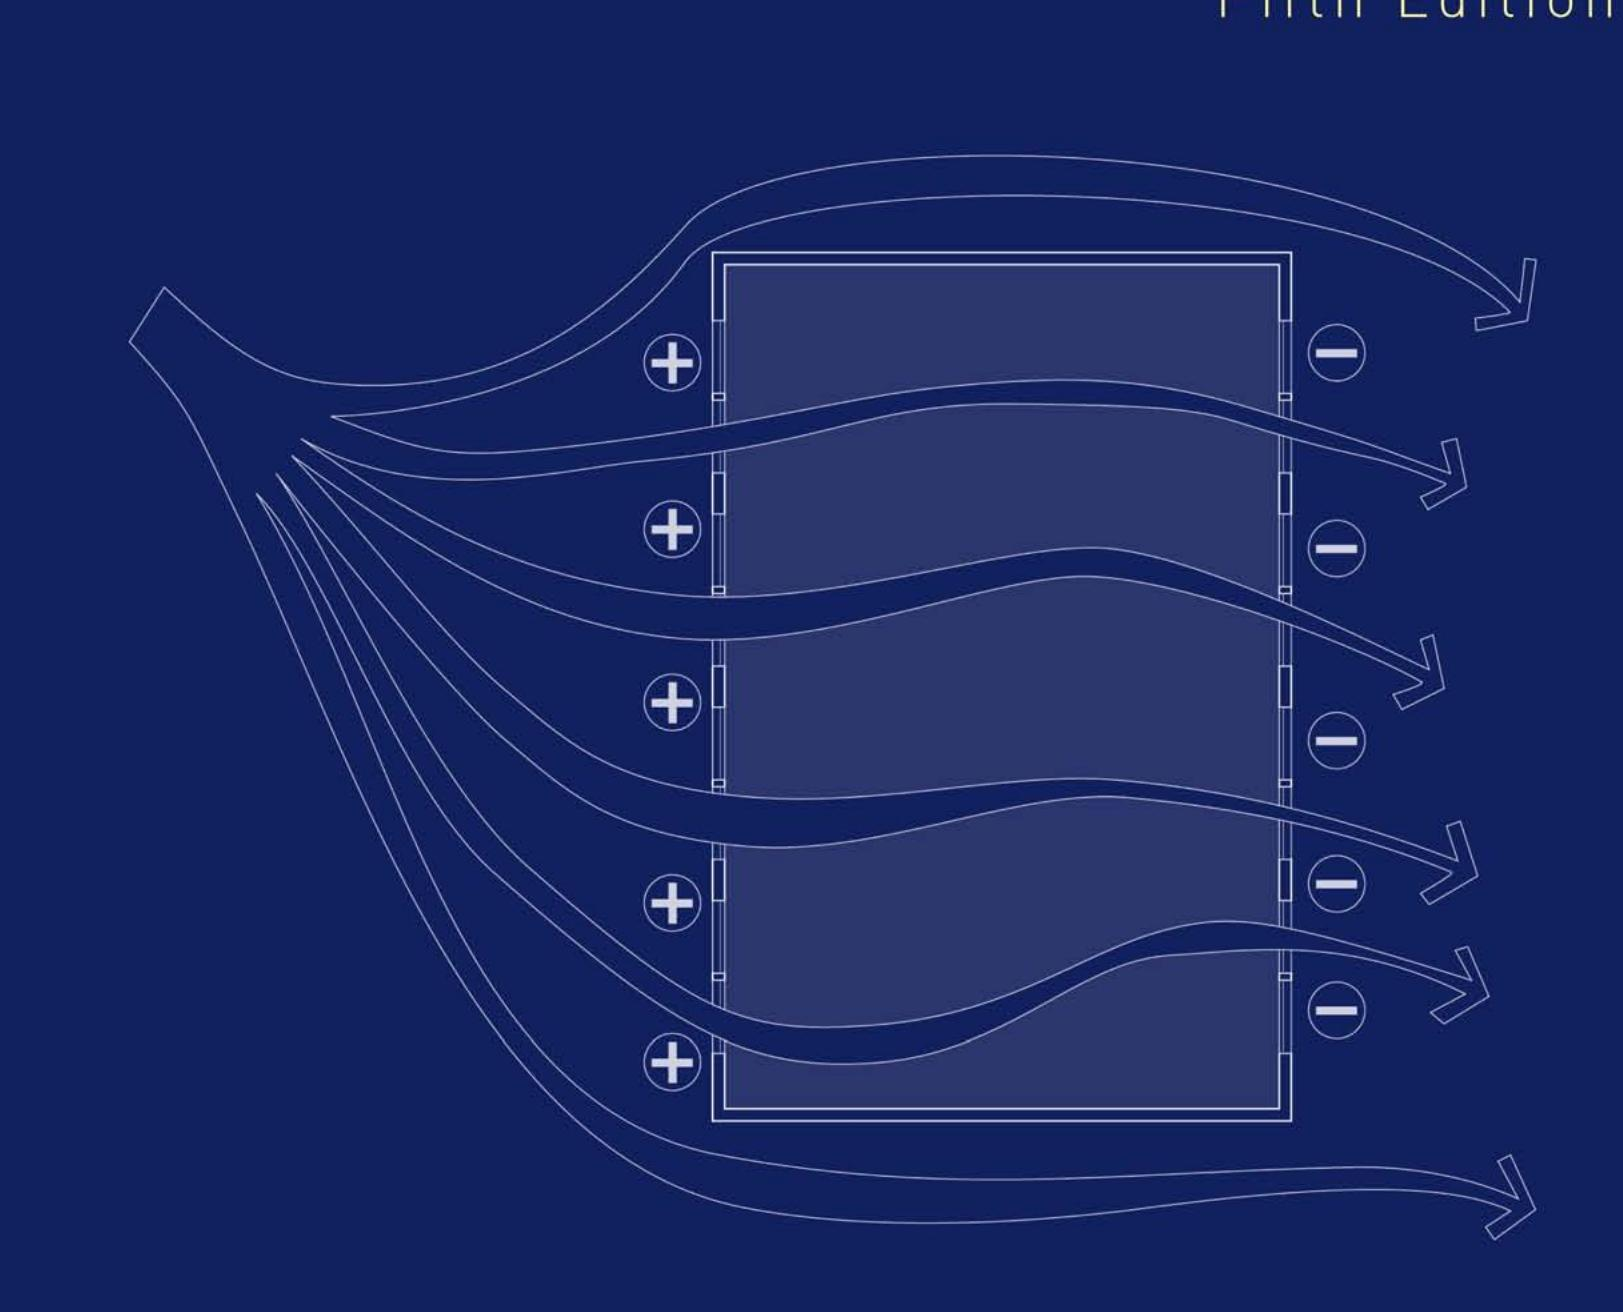

In [48]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

SUMMARISING THE DATA

In [21]:
%pip install -Uq langchain-groq

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

load_dotenv() # This should be called early in your script
api_key = os.getenv("GROQ_API_KEY")

if not api_key:
    print("Error: GROQ_API_KEY not found in environment variables.")
    # Potentially exit or raise an error
else:
    print("GROQ_API_KEY loaded successfully.") # For debugging

# ... rest of your code that uses the Groq client ...
# client = Groq(api_key=api_key)
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")

GROQ_API_KEY loaded successfully.


In [23]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(openai_api_key=api_key, temperature=0.5, model="gpt-3.5-turbo")


In [49]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
# Use the existing ChatGroq instance (model) for the summarization chain
model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [50]:
print(texts[1])

Published simultaneously in Canada

No part of this publication may be reproduced, stored in a retrieval system, or transmitted in any form or by any means, electronic, mechanical, photocopying, recording, scanning, or otherwise, except as permitted under Section 107 or 108 of the 1976 United States Copyright Act, without either the prior written permission of the Publisher, or authorization through payment of the appropriate per-copy fee to the Copyright Clearance Center, Inc., 222 Rosewood Drive, Danvers, MA 01923, 978-750-8400, fax 978-646-8600, or on the web at www.copyright.com. Requests to the Publisher for permission should be addressed to the Permissions Department, John Wiley & Sons, Inc., 111 River Street, Hoboken, NJ 07030, 201-748-6011, fax 201-748-6008, or online at http://www.wiley.com/go/permissions.

Limit of Liability/Disclaimer of Warranty: While the Publisher and author have used their best efforts in preparing this book, they make no representations or warranties wi

CHAIN SUMMARISIE

In [51]:
print(summarize_chain)

first={
  element: RunnableLambda(lambda x: x)
} middle=[ChatPromptTemplate(input_variables=['element'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['element'], input_types={}, partial_variables={}, template='\nYou are an assistant tasked with summarizing tables and text.\nGive a concise summary of the table or text.\n\nRespond only with the summary, no additionnal comment.\nDo not start your message by saying "Here is a summary" or anything like that.\nJust give the summary as it is.\n\nTable or text chunk: {element}\n\n'), additional_kwargs={})]), ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002424F57D240>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002424F5CF640>, model_name='llama-3.1-8b-instant', temperature=0.5, model_kwargs={}, groq_api_key=SecretStr('**********'))] last=StrOutputParser()


In [52]:
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
# Use the existing ChatGroq instance (model) for the summarization chain
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [35]:
# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

KeyboardInterrupt: 

In [53]:
import time

def safe_batch(chain, items, config, max_retries=5):
    for attempt in range(max_retries):
        try:
            return chain.batch(items, config)
        except Exception as e:
            if "rate limit" in str(e).lower():
                wait_time = 5  # seconds, or parse from error if available
                print(f"Rate limit hit, retrying in {wait_time} seconds... (attempt {attempt+1})")
                time.sleep(wait_time)
            else:
                raise
    raise RuntimeError("Max retries exceeded due to rate limits.")

# Summarize text
text_summaries = safe_batch(summarize_chain, texts, {"max_concurrency": 1})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = safe_batch(summarize_chain, tables_html, {"max_concurrency": 1})

In [54]:
text_summaries

["The Architect's Studio Companion, 5th edition, by Edward Allen and Joseph Iano, provides rules of thumb for preliminary design, serving as a companion for architects with first approximations and general guidelines, not intended for final building design.",
 'This publication is protected by copyright and any reproduction requires permission from the Publisher or payment to the Copyright Clearance Center.',
 'Contact Customer Care Department at 800-762-2974 (US) or 317-572-3993 (outside US) for product and technical support information. Additional resources include wiley.com and booksupport.wiley.com.',
 'This is the 5th edition of "The Architect\'s Studio Companion" by Edward Allen and Joseph Iano, a handbook for preliminary architectural design, published in various formats with ISBNs.',
 'This document is a guidebook that outlines the design process for large buildings, covering topics such as building codes, structural systems, daylighting, mechanical and electrical services, egr

In [ ]:
table_summaries

[]

In [ ]:
%pip install -Uq langchain-openai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from langchain_openai import ChatOpenAI

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(images)

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for gpt-4o-mini in organization org-WA0RCZgEMlRU7Yhzo98tuXFI on tokens per min (TPM): Limit 200000, Used 200000, Requested 818. Please try again in 245ms. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

Load data and summaries to vectorstore

In [ ]:
print(image_summaries)

['The image is a detailed chart representing the total tributary area versus nominal column sizes for steel columns at normal height. Here’s an in-depth description:\n\n### Structure:\n- **Axes**: \n  - The **vertical axis** (Y-axis) measures the **total tributary area** in square feet and square meters, ranging from **100 ft² (9.5 m²)** at the bottom to **100,000 ft² (9,500 m²)** at the top.\n  - The **horizontal axis** (X-axis) lists **nominal column sizes** (denoted by "W" followed by a number) increasing from **W4 (100 mm)** on the left to **W14 (350 mm)** on the right.\n\n### Data Representation:\n- **Bars**: \n  - There are several **black bars** on the graph, each representing a different steel column size.\n  - Each bar corresponds to varying **total tributary areas**, indicating how much area a specific steel column can support.\n  - The height of each bar corresponds to the total tributary area that respective column size supports.\n\n### Annotations:\n- Each bar includes tex

In [ ]:
%pip install gradio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the summaries and link the to the original data using document id

In [56]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

In [57]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
if summary_texts:
    retriever.vectorstore.add_documents(summary_texts)
    retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables only if tables and summaries exist
if tables and table_summaries:
    table_ids = [str(uuid.uuid4()) for _ in tables]
    summary_tables = [
        Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
    ]
    retriever.vectorstore.add_documents(summary_tables)
    retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries only if images and image_summaries exist
if 'image_summaries' in locals() and images and image_summaries:
    img_ids = [str(uuid.uuid4()) for _ in images]
    summary_img = [
        Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
    ]
    retriever.vectorstore.add_documents(summary_img)
    retriever.docstore.mset(list(zip(img_ids, images)))

In [31]:
# Retrieve
chunks= retriever.invoke(
    "what shoud be the size of a steel column?",

)

print(chunks)

[]


In [ ]:
%pip install pymupdf

import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

def plot_pdf_with_boxes(pdf_page, segments):
    """
    pdf_page : a fitz.Page object
    segments : list of dicts, each with keys:
        - 'bbox': (x0, y0, x1, y1) in PDF coordinates
        - optional 'label': text to show by the box
    """

    # 1) Render the PDF page to an image (we zoom ×2 for clarity)
    zoom = 2.0
    mat = fitz.Matrix(zoom, zoom)
    pix = pdf_page.get_pixmap(matrix=mat, alpha=False)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # 2) Plot the image
    fig, ax = plt.subplots(figsize=(8, 10))
    ax.imshow(img)
    ax.axis('off')  # no axes clutter

    # 3) For each segment, draw a rectangle (and label, if given)
    for seg in segments:
        x0, y0, x1, y1 = seg['bbox']
        w, h = (x1 - x0) * zoom, (y1 - y0) * zoom
        rect = patches.Rectangle(
            (x0 * zoom, y0 * zoom), w, h,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)

        label = seg.get('label', None)
        if label:
            ax.text(
                x0 * zoom, y0 * zoom - 2,    # a little above the box
                label, fontsize=8, color='blue',
                backgroundcolor='white', alpha=0.7
            )

    plt.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import fitz  # make sure you did `pip install PyMuPDF`

def render_page(
    doc_list: list,
    page_number: int,
    print_text: bool = True
) -> None:
    """
    doc_list    : list of tuples (pdf_path, segments)
                  e.g. [("file1.pdf", segments1), ("file2.pdf", segments2), ...]
    page_number : which entry in doc_list to show
    print_text  : whether to print each segment's 'text' to console
    """

    pdf_path, segments = doc_list[page_number]

    # 1) Open the document and load the page
    doc = fitz.open(pdf_path)
    page = doc.load_page(page_number)  # 0-based

    # 2) Optionally dump the segment texts
    if print_text:
        print(f"--- Text from {pdf_path}, page {page_number} ---")
        for i, seg in enumerate(segments, 1):
            text = seg.get('text', '').strip()
            print(f"{i:>2}. {text}")

    # 3) Draw the boxes
    plot_pdf_with_boxes(page, segments)


In [58]:
# since we are using chunking, we get chunks of related documents
# since we selected "by_title" as the chunking strategy, we get sections of the document based on their title
for i, chunk in enumerate(chunks):
    if "CompositeElement" in str(type(chunk)):
        print("\n\nChunk", i)
        for doc in chunk.metadata.orig_elements:
            print(doc.to_dict()["type"], doc.metadata.page_number)



Chunk 0
Title 1
Image 1
Title 1
Title 1
NarrativeText 3
NarrativeText 3
NarrativeText 3
NarrativeText 4
NarrativeText 4
NarrativeText 5
Title 5
NarrativeText 5
NarrativeText 5
Title 5
Image 5
NarrativeText 5
NarrativeText 5
Title 6
NarrativeText 6
NarrativeText 6
NarrativeText 6
NarrativeText 6


Chunk 1
Title 6
NarrativeText 6
NarrativeText 6


Chunk 2
NarrativeText 6
NarrativeText 6


Chunk 3
Title 6
Title 6
NarrativeText 6
Title 6
Title 6
NarrativeText 6
UncategorizedText 6
NarrativeText 6
NarrativeText 6
NarrativeText 6
NarrativeText 6
NarrativeText 6


Chunk 4
Title 7
Title 7
NarrativeText 7
Table 7


Chunk 5
Title 7
ListItem 7
Title 7
NarrativeText 7
NarrativeText 7
NarrativeText 8
NarrativeText 8
Title 9
NarrativeText 9
NarrativeText 9
NarrativeText 9
NarrativeText 9
NarrativeText 9
NarrativeText 9


Chunk 6
NarrativeText 9


Chunk 7
Title 9
Title 9
NarrativeText 9
NarrativeText 9
NarrativeText 10
NarrativeText 10
Title 11
NarrativeText 11
NarrativeText 11
NarrativeText 11
Lis

RAG PIPELINE

In [61]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}

    
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [62]:


import gradio as gr

def rag_qa(question):
    response = chain_with_sources.invoke(question)
    answer = response['response']
    context = ""
    for text in response['context']['texts']:
        context += f"{text.text}\n(Page: {getattr(text.metadata, 'page_number', 'N/A')})\n\n"
    return answer, context

iface = gr.Interface(
    fn=rag_qa,
    inputs=gr.Textbox(lines=2, label="Ask a question about the document"),
    outputs=[
        gr.Textbox(label="Answer"),
        gr.Textbox(label="Context (source text)")
    ],
    title="Tump rule of structure",
    description="Ask questions about your PDF. The answer and supporting context will be shown."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7865
* To create a public link, set `share=True` in `launch()`.


In [ ]:
response = chain_with_sources.invoke(
    "What is size of the steel column?",
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

User: What is size of the steel column?
System: [No explicit system prompt used]
Assistant: The size of the steel column is indicated alongside the nominal shape curves in the chart. However, the specific size is not mentioned in the provided context. To determine the actual size, you would need to refer to the chart specified, which includes the nominal sizes of the steel wide-flange section columns.


Context:
5 '§ iS Ss 8 3 8 iS

07_9780470641910-cmp04.indd 97

The top chart is for steel wide- flange section columns up to 12 ft (3.7 m) tall between floors. Total tributary area is the summed area of the roof and all floors supported by the column.

M

E

i # 4 a

T

S

Y

S

L

A

R

U

T

C

m For medium loads, read direct- & ly from the chart. For light loads, a reduce the total tributary area Fs supported by the column by 10% o before reading the chart; for heavy a loads, increase the area supported 4 by 15%.

U

——

. @ Actual column sizes are shown to the sides of the bars. Not 

In [ ]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode

# (reuse your parse_docs unchanged)

def build_prompt(kwargs):
    docs_by_type   = kwargs["context"]
    user_question  = kwargs["question"]
    section        = kwargs["section_args"]

    # serialize your section parameters into the exact code line
    section_line = (
        f'model.add_section("{section["name"]}", '
        f'A={section["A"]}, '
        f'Iy={section["Iy"]}, '
        f'Iz={section["Iz"]}, '
        f'J={section["J"]})'
    )

    # include both your RAG context and the code‐line you want the LLM to use
    prompt = f"""
    You have this PyNite model:

    {section_line}

    And this context: {''.join(el.text for el in docs_by_type["texts"])}
    
    Question: {user_question}

    Provide just the completed code snippet (with no extra commentary).
    """
    return ChatPromptTemplate.from_messages(
        [HumanMessage(content=[{"type":"text","text":prompt}])]
    )

chain = (
    {
      "context": retriever | RunnableLambda(parse_docs),
      "question": RunnablePassthrough(),
      "section_args": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

# now call it, passing your desired section properties:
answer = chain.run(
    context=raw_docs,
    question="Use this section in the model and tell me the member stresses.",
    section_args={
      "name": "W18x35",
      "A": 10.3,
      "Iy": 15.3,
      "Iz": 510,
      "J": 0.506
    }
)
print(answer)


NameError: name 'retriever' is not defined